#### import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import pickle

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
ProfileReport(df)

In [10]:
# in case all the col has no missing value if there has any of missing
#then apply this type of steps
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## replace the "Zero" with "mean"

In [11]:
df["BMI"] = df["BMI"].replace(0, df["BMI"].mean())B

In [15]:
df["BloodPressure"] = df["BloodPressure"].replace(0,df["BloodPressure"].mean())
df["Insulin"] = df["Insulin"].replace(0,df["Insulin"].mean())
df["Glucose"] = df["Glucose"].replace(0,df["Glucose"].mean())
df["SkinThickness"] = df["SkinThickness"].replace(0,df["SkinThickness"].mean())

## Outlier
### skweness -----> outlier  
use box plot -- to give perfect result

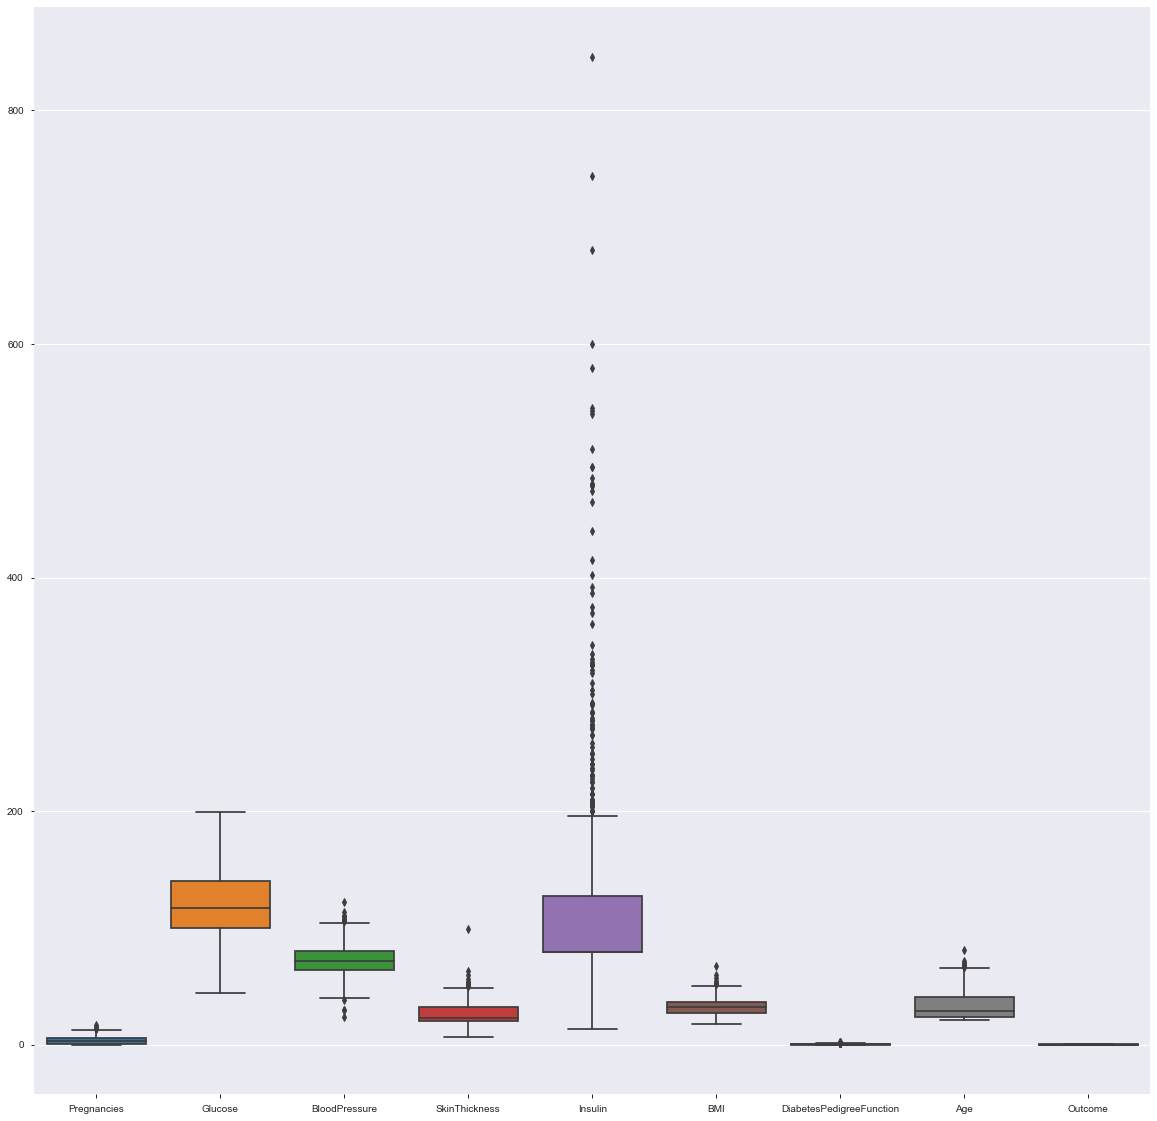

In [16]:
fig , ax = plt.subplots(figsize = (20,20))
sns.boxplot(data=df,ax=ax)

#### outlier
data which present in dataset in fig above and below the graph. In case we remove part of the dataset or some percentile of dataset.

** when we remove the some part of dataset it affect the whole dataset or sometime it generate the outlier, because erase the whole row that come under the dataset

In [31]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [32]:
# "quantile(n) :- basically it say that put n no. of data and remove(1-n)% of data from "tail" part
q = df["Pregnancies"].quantile(0.98)
df_new = df[df["Pregnancies"]<q]

# now change again from the updated one data set

q = df_new["BMI"].quantile(0.99)
df_new = df_new[df_new["BMI"]<q]

q = df_new["SkinThickness"].quantile(0.99)
df_new = df_new[df_new["SkinThickness"]<q]

q = df_new["Insulin"].quantile(0.95)
df_new = df_new[df_new["Insulin"]<q]

q = df_new["DiabetesPedigreeFunction"].quantile(0.99)
df_new = df_new[df_new["DiabetesPedigreeFunction"]<q]

q = df_new["Age"].quantile(0.99)
df_new = df_new[df_new["Age"]<q]

## Outlier remover -- Function

In [33]:
def outlier_removal(self,data):
        def outlier_limits(col):
            Q3, Q1 = np.nanpercentile(col, [75,25])
            IQR= Q3-Q1
            UL= Q3+1.5*IQR
            LL= Q1-1.5*IQR
            return UL, LL

        for column in data.columns:
            if data[column].dtype != 'int64':
                UL, LL= outlier_limits(data[column])
                data[column]= np.where((data[column] > UL) | (data[column] < LL), np.nan, data[column])

        return data


In [34]:
# now the data from remove outlier is shift from the 
# df----> df_new
# here there is no oullier so we can easily use the "df" outerwise we run above 2 cell and easily remove the outlier

In [36]:
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [37]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


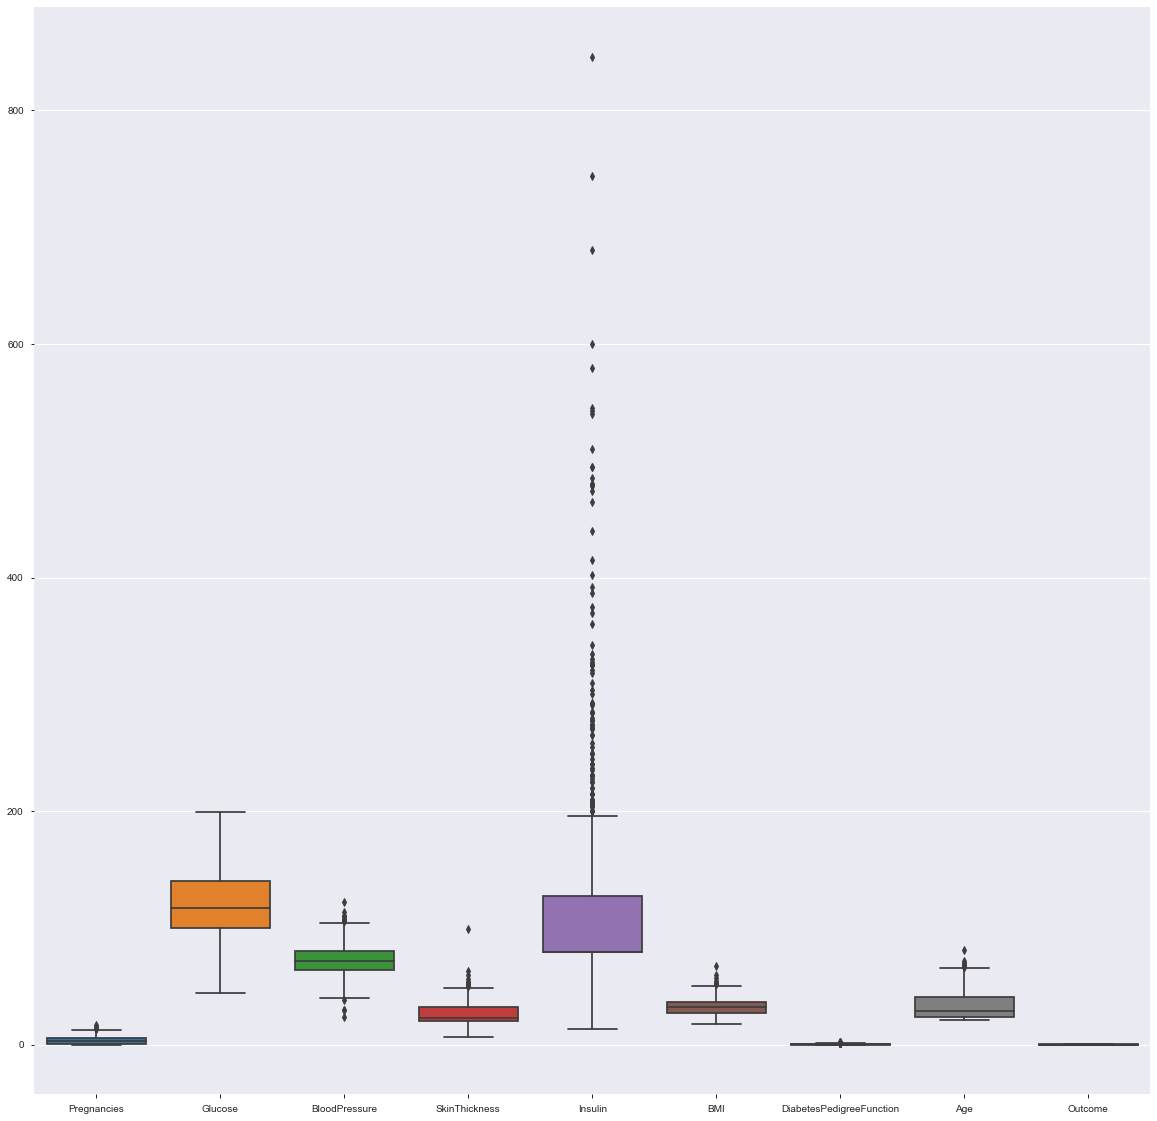

In [38]:
fig ,ax = plt.subplots(figsize=(20,20))
sns.boxplot(data =df, ax =ax)

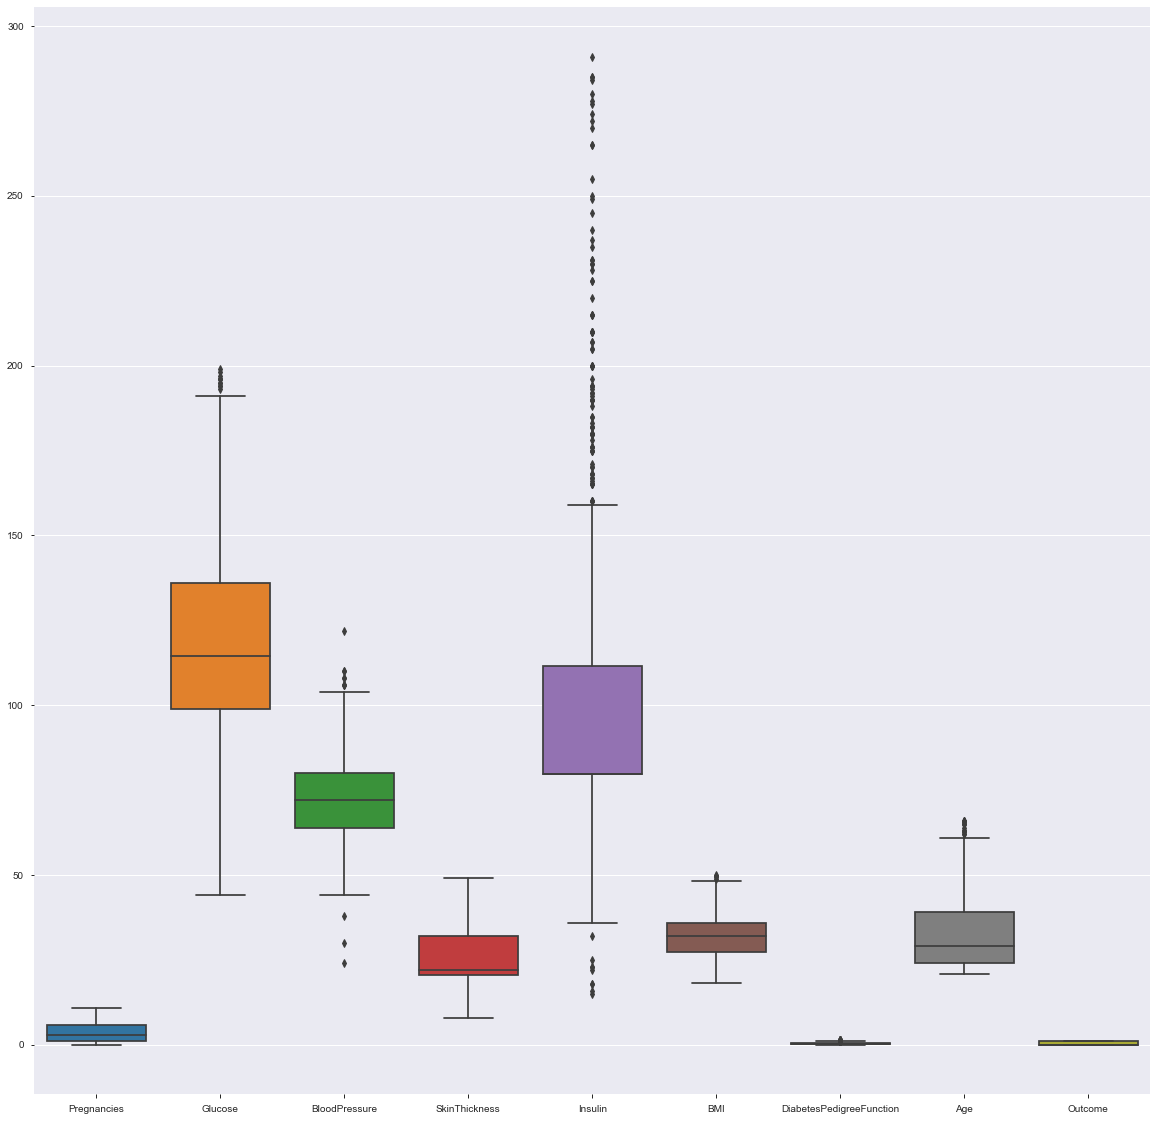

In [39]:
fig ,ax = plt.subplots(figsize =(20,20))
sns.boxplot(data = df_new , ax=ax)

In [40]:
ProfileReport(df_new)

### Standard Scaling

here the data is far vary as it min and max far away from each other --for this we use Standard scaling to balance it 

** Standard Scaling done together with train-test case because at train test data is splited into 2 parts and for this we perform the seperate standard scaling for the seperated dataset

In [41]:
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [45]:
y = df_new["Outcome"]
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 674, dtype: int64

In [47]:
X= df_new.drop(columns=["Outcome"])
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [54]:
# Standard Scaling
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [55]:
df_new_scalar = pd.DataFrame(scalar.fit_transform(df_new))

In [56]:
df_new_scalar

,0,1,2,3,4,5,6,7,8
0,0.796754,0.983984,0.000453,1.091487,-0.434192,0.265820,0.630485,1.601415,1.431703
1,-0.864794,-1.169776,-0.504474,0.385681,-0.434192,-0.831445,-0.338079,-0.132706,-0.698469
2,1.461373,2.180518,-0.672784,-0.609921,-0.434192,-1.348727,0.788402,-0.041437,1.431703
3,-0.864794,-1.033030,-0.504474,-0.320125,-0.144202,-0.596317,-0.983787,-1.045402,-0.698469
4,0.464444,-0.109989,0.168762,-0.609921,-0.434192,-0.988197,-0.864472,-0.223976,-0.698469
...,...,...,...,...,...,...,...,...,...
669,2.125992,-0.622789,0.337071,2.620733,1.612009,0.156093,-0.969750,2.787919,-0.698469
670,-0.532484,0.095131,-0.167856,0.150413,-0.434192,0.767426,-0.376681,-0.497785,-0.698469
671,0.464444,0.060944,0.000453,-0.320125,0.223377,-0.894146,-0.710063,-0.223976,-0.698469
672,-0.864794,0.231877,-1.009402,-0.609921,-0.434192,-0.282813,-0.345097,1.327607,1.431703


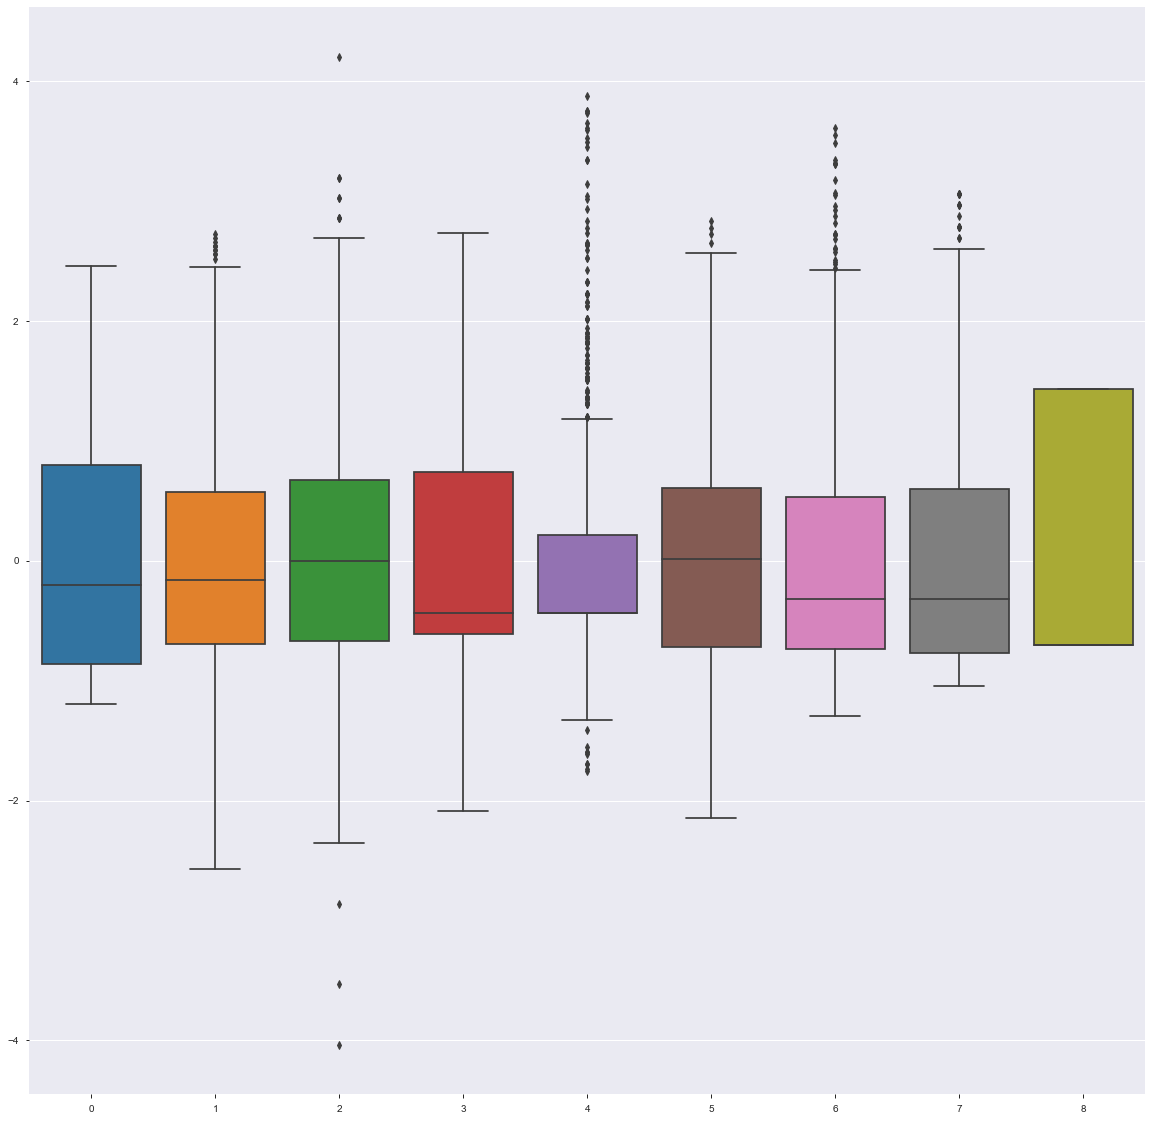

In [58]:
fig ,ax =plt.subplots(figsize=(20,20))
sns.boxplot(data = df_new_scalar , ax=ax)

In [60]:
X_scaled

array([[ 7.96753910e-01,  9.83984062e-01,  4.52611463e-04, ...,
         2.65819648e-01,  6.30484542e-01,  1.60141519e+00],
       [-8.64793539e-01, -1.16977621e+00, -5.04474494e-01, ...,
        -8.31445036e-01, -3.38078670e-01, -1.32706484e-01],
       [ 1.46137289e+00,  2.18051755e+00, -6.72783529e-01, ...,
        -1.34872696e+00,  7.88402456e-01, -4.14369227e-02],
       ...,
       [ 4.64444420e-01,  6.09439465e-02,  4.52611463e-04, ...,
        -8.94145875e-01, -7.10063091e-01, -2.23976046e-01],
       [-8.64793539e-01,  2.31877301e-01, -1.00940160e+00, ...,
        -2.82812694e-01, -3.45097244e-01,  1.32760650e+00],
       [-8.64793539e-01, -8.96282840e-01, -1.67856424e-01, ...,
        -2.35787064e-01, -4.64413001e-01, -8.62862978e-01]])

In [61]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 674, dtype: int64

## VIF score 

multicolinearity -- 
1) Pearson graph
2) VIF model

** vif -- variance inflation factor
** VIF = (1/(1-r^2))
** VIF>10 ---> high collinearity


In [62]:
def vif_score(x):
    scaler = StandardScaler()
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=["FEATURE", "VIF_SCORE"])

In [63]:
vif_score(X)

,FEATURE,VIF_SCORE
0,Pregnancies,1.449056
1,Glucose,1.304263
2,BloodPressure,1.262686
3,SkinThickness,1.470049
4,Insulin,1.271017
5,BMI,1.513160
6,DiabetesPedigreeFunction,1.042300
7,Age,1.662728


In [64]:
# here we observe that all the value is less than 10 so there is no changes for the collinearity

## Train-Test dataset

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled , y , test_size = 0.20, random_state = 144)

# test_size basically no. of test size(n) and remaning -->(1-n) for the training
# and random state ---> this used for the seed to help to fix the randomize the dataset

In [66]:
x_train

array([[-0.86479354,  0.19769063, -1.85094678, ...,  0.21879402,
         1.80609569, -0.40651517],
       [ 2.45830136,  1.22329076,  0.33707068, ...,  0.21879402,
         3.1782269 ,  1.69268475],
       [ 0.13213493,  0.91561072,  1.09446134, ..., -0.47091521,
        -0.90658316, -0.49778473],
       ...,
       [-0.86479354, -0.28092276,  1.17861586, ..., -0.28281269,
        -1.06801036, -0.86286298],
       [ 1.46137289,  0.02675728,  0.50537972, ..., -1.08224839,
        -0.13454002,  2.87918905],
       [-0.86479354, -0.75953616, -0.33616546, ..., -0.73739378,
         2.27283086, -0.95413254]])

In [67]:
x_test

array([[ 1.32134931e-01, -1.44176079e-01,  4.52611463e-04, ...,
        -4.70915211e-01, -2.50346495e-01,  1.23633694e+00],
       [-1.19710303e+00,  6.76304024e-01, -8.41092564e-01, ...,
        -1.53682948e+00, -8.43415997e-01, -1.04540210e+00],
       [ 2.45830136e+00,  8.13050708e-01,  1.85185200e+00, ...,
         7.36075942e-01, -6.78479508e-01,  1.69268475e+00],
       ...,
       [ 7.96753910e-01, -5.54416131e-01, -5.04474494e-01, ...,
        -1.19197486e+00, -6.96025943e-01, -3.15245608e-01],
       [-5.32484049e-01, -1.20396288e+00, -2.43135269e-01, ...,
         1.38528976e-02, -5.03015158e-01, -1.04540210e+00],
       [-8.64793539e-01, -1.64838960e+00, -2.01925581e+00, ...,
        -1.80330804e+00, -4.36338705e-01, -9.54132539e-01]])

In [68]:
y_train

356    1
259    1
69     0
407    0
657    0
      ..
734    0
485    1
249    0
509    0
416    0
Name: Outcome, Length: 539, dtype: int64

In [69]:
y_test

406    1
511    0
24     1
751    0
689    1
      ..
3      0
469    0
587    0
60     0
97     0
Name: Outcome, Length: 135, dtype: int64

In [70]:
x_test[0]

array([ 1.32134931e-01, -1.44176079e-01,  4.52611463e-04, -6.09921498e-01,
       -4.34192020e-01, -4.70915211e-01, -2.50346495e-01,  1.23633694e+00])

In [72]:
# logistic Regression
# using the "solver"= liblinear

logc_liblinear = LogisticRegression(verbose = 1, solver = "liblinear")

In [73]:
logc_liblinear.fit(x_train,y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=1,
                   warm_start=False)

In [76]:
logc_liblinear.predict_proba([x_test[1]])

array([[0.91450958, 0.08549042]])

In [83]:
# logistic with ---> "lbfgs"
logd = LogisticRegression(verbose = 1)

In [84]:
logd.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [86]:
logd.predict_proba([x_test[1]])

array([[0.91629065, 0.08370935]])

In [88]:
logd.predict([x_test[1]])

array([0])

In [89]:
logd.predict_log_proba([x_test[1]])

array([[-0.08742167, -2.48040456]])

In [90]:
type(y_test)

pandas.core.series.Series

In [95]:
y_test.iloc[0]    # in case it present in the 1st  element is 1 

1

In [96]:
y_test

406    1
511    0
24     1
751    0
689    1
      ..
3      0
469    0
587    0
60     0
97     0
Name: Outcome, Length: 135, dtype: int64

In [98]:
y_pred_liblinear = logc_liblinear.predict(x_test)

In [99]:
y_pred_liblinear

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0])

In [101]:
y_pred_default = logd.predict(x_test)

In [102]:
y_pred_default

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0])

In [103]:
confusion_matrix(y_test,y_pred_liblinear)

array([[77, 10],
       [24, 24]])

In [104]:
confusion_matrix(y_test, y_pred_default)

array([[77, 10],
       [24, 24]])

## confusion matrix

In [105]:
def model_eval(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    specificity=tn/(fp+tn)
    F1_Score = 2*(recall * precision) / (recall + precision)
    result={"Accuracy":accuracy,"Precision":precision,"Recall":recall,'Specficity':specificity,'F1':F1_Score}
    return result
model_eval(y_test,y_pred_liblinear)

{'Accuracy': 0.7481481481481481,
 'Precision': 0.7058823529411765,
 'Recall': 0.5,
 'Specficity': 0.8850574712643678,
 'F1': 0.5853658536585366}

In [106]:
model_eval(y_test,y_pred_default)   # for the default one

{'Accuracy': 0.7481481481481481,
 'Precision': 0.7058823529411765,
 'Recall': 0.5,
 'Specficity': 0.8850574712643678,
 'F1': 0.5853658536585366}

### AUC and ROC

In [107]:
auc = roc_auc_score(y_test,y_pred_liblinear)

In [109]:
roc_auc_score(y_test,y_pred_default)

0.692528735632184

In [110]:
fpr, tpr, thresholds  = roc_curve(y_test,y_pred_liblinear)

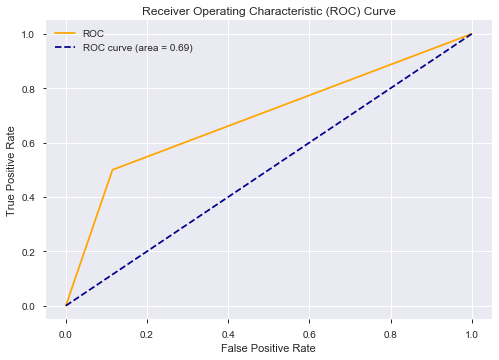

In [111]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()